<center>
<img
src="https://i.ibb.co/th5MTcv/logo.png" width="800" 
     />
</center>

---

Eduard Larrañaga (ealarranaga@unal.edu.co)

---

## Orbit equation for a particle under Newtonian gravity.

The equations of the obit for a particle moving under Newtonian gavity is obtained from the Lagrangian describing the system. It gives

\begin{equation}
\frac{d^2 u}{d\varphi^2} = - u +\frac{GM}{\ell^2}
\end{equation}

\begin{equation}
\begin{cases}
\frac{du}{d\varphi} = & z\\
\frac{d z}{d\varphi} = & - u +\frac{GM}{\ell^2}
\end{cases}
\end{equation}

where we have identified the conserved quantity 
- z-component of the angular momentum : $\ell = p_\phi$ 

An important consideration has to do with the magnitudes of the physical quantities and constants involved in the problem. For the development, we will use the following system of units:

- Units of mass: Solar Masses $M_{\odot}$
- Distance units: astronomical units [au]
- Time units: years [yr]

In this system of units, the Newtonian gravitational constant takes the value $G = 4\pi^2$.

### Initial Conditions 

The initial conditions needed to solve the dfferential equations may be given as the chosen value for the anuglar momentum $\ell$ and:
- The values for the initial position, 
$$
u_0 = 1/r_0
$$
- and the initial value of the derivative, 
$$
z_0 = \frac{du}{d\varphi} = -\frac{1}{r_0^2}\left. \frac{dr}{d\varphi} \right|_{0} = -\frac{1}{r_0^2}\frac{\dot{r}_0}{\dot{\varphi_0}} = - \frac{\dot{r}_0}{\ell}.
$$ 





In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from numpy import sin, cos, pi

G = 4*pi**2

def N_orbit(phi, x):
    '''
    This function contains the differential equation 
    of the orbit for a particle moving in Newtonian 
    space.
    '''
    # Coordinates and momentum components
    u = x[0]
    z = x[1]
    

    # Differential equations 
    dudphi = z
    dzdphi = - u + G*M/L**2

    return np.array([dudphi, dzdphi])


## Effective Potential

In order to establish the initial condition for a particular orbit, it is possible to use the effective potential, which is defined as

\begin{equation}
V_{eff} (r) = \frac{\ell^2}{2r^2}  - \frac{GM}{r}  .
\end{equation}

We can define the initial conditions by considering one of the return points in the orbit (apsis). At these points we have $\dot{r}_{\text{(apsis)}} = 0$.


Energy of the particle:  -15.797362673929058
Initial conditions: [r_0, dotr_0] =  [0.6, 0.0]
Initial conditions: [u_0, z_0] =  [1.6666666666666667, 0.0]


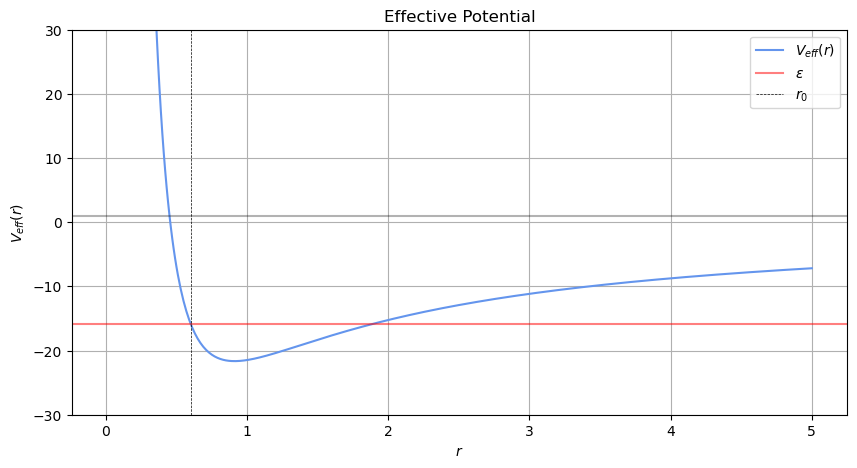

In [45]:

def Veff(r, L):
    '''
    Effective Potential
    '''
    return 0.5*(L/r)**2 - G*M/r


# Mass of the central object
M = 1.

# Initial condition at one of the apsis
r0 = 0.6
dotr0 = 0.

L = 6

# Energy of the particle
energy = Veff(r0,L=L)
print('Energy of the particle: ', energy)

x0 = [1/r0, dotr0]
print('Initial conditions: [r_0, dotr_0] = ', [r0, dotr0])
print('Initial conditions: [u_0, z_0] = ', [1/r0, dotr0])

rrange = np.linspace(0.01,5,500)
plt.figure(figsize=(10,5))
plt.plot(rrange, Veff(rrange,L=L), color='cornflowerblue', label= r'$V_{eff}(r)$')

plt.axhline(1, color = 'black', alpha=0.3)
plt.axhline(energy, color = 'red', alpha=0.5, label=r'$\varepsilon$')
plt.axvline(r0, color='black',linewidth=0.5, linestyle='--', label=r'$r_0$')

plt.title('Effective Potential')
plt.xlabel(r'$r$')
plt.ylabel(r'$V_{eff}(r)$')
plt.grid()
plt.ylim(-30,30)
plt.legend()

plt.show()
    

In [46]:
# Range of the angle phi
phi_i = 0.
phi_f = 30.
n = 100000

phi_range = np.linspace(phi_i, phi_f,n)

sol = solve_ivp(N_orbit, [phi_i, phi_f], x0, t_eval = phi_range)

sol

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  3.000e-04 ...  3.000e+01  3.000e+01]
        y: [[ 1.667e+00  1.667e+00 ...  1.190e+00  1.191e+00]
            [ 0.000e+00 -1.710e-04 ...  5.624e-01  5.623e-01]]
      sol: None
 t_events: None
 y_events: None
     nfev: 248
     njev: 0
      nlu: 0

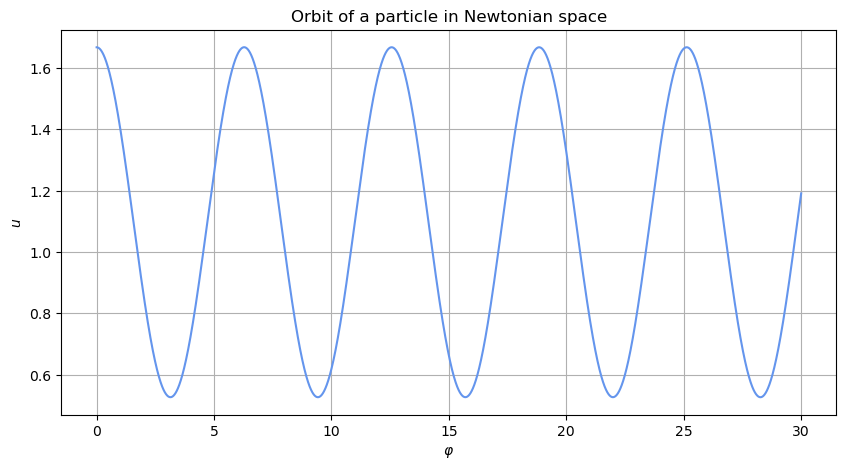

In [47]:
plt.figure(figsize=(10,5))
plt.plot(phi_range, sol.y[0], color='cornflowerblue')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$u$')
plt.title('Orbit of a particle in Newtonian space')
plt.grid()
plt.show()

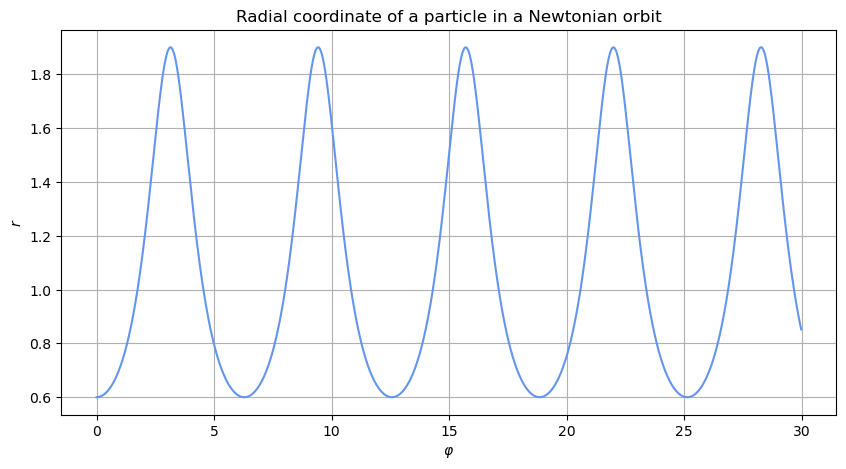

In [48]:
solr = 1/sol.y[0]
plt.figure(figsize=(10,5))
plt.plot(phi_range[::100], solr[::100], color='cornflowerblue')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$r$')
plt.title(r'Radial coordinate of a particle in a Newtonian orbit')
plt.grid()
plt.show()

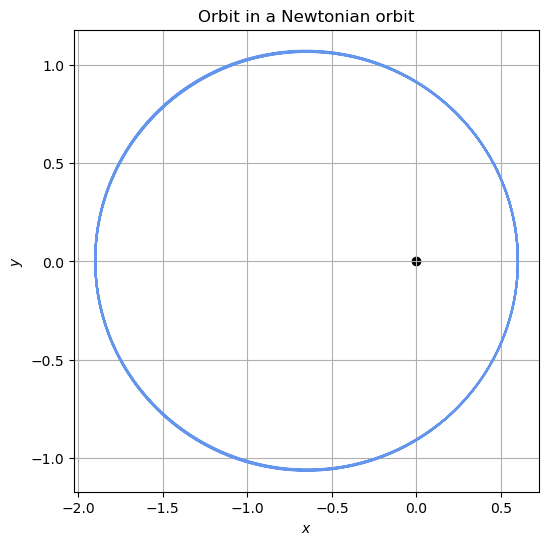

In [49]:
#Cartesian Coodinates Solution
solx = solr*cos(phi_range)
soly = solr*sin(phi_range)

plt.figure(figsize=(6,6))
plt.scatter(0,0, color='black')
plt.plot(solx, soly, color='cornflowerblue')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Orbit in a Newtonian orbit')
plt.grid()
plt.show()

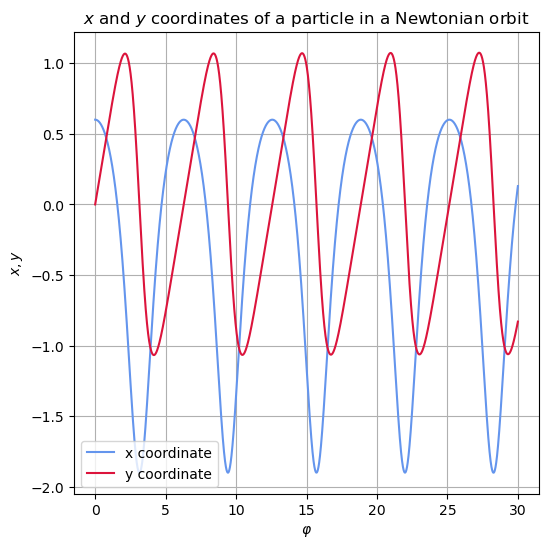

In [50]:
plt.figure(figsize=(6,6))
plt.plot(phi_range, solx, color='cornflowerblue', label='x coordinate')
plt.plot(phi_range, soly, color='crimson', label='y coordinate')
plt.xlabel(r'$\varphi$')

plt.ylabel(r'$x,y$')
plt.title(r'$x$ and $y$ coordinates of a particle in a Newtonian orbit')
plt.grid()
plt.legend()
plt.show()

In [52]:
# Save data of the orbit
orbit_data = np.array([phi_range, sol.y[0]]).T


np.savetxt('../04. Newton Gravity/Newtonian_orbit.txt', orbit_data, header='phi, u')

In [43]:
orbit_data.shape

(100000, 2)